#### 生成随机数据

In [160]:
import torch
from torch import nn
import matplotlib.pyplot as plt

In [161]:
T = 1000  # 总共产生1000个点
time = torch.arange(1, T + 1, dtype=torch.float32)
x = torch.sin(0.01 * time) + torch.normal(0, 0.2, (T,))

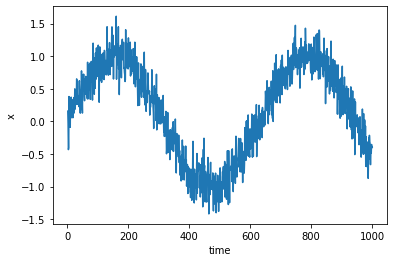

In [162]:
plt.plot(time.numpy(), x.numpy())
plt.xlabel('time')
plt.ylabel('x')
plt.savefig('./image.jpg', dpi=1000)
plt.show()

#### 构建样本数据集

In [163]:
tau = 4
features = torch.zeros((T - tau, tau))
for i in range(tau):
    features[:, i] = x[i: T - tau + i]
labels = x[tau:].reshape((-1, 1))

#### 创建数据迭代器

In [164]:
features.shape

torch.Size([996, 4])

In [165]:
labels.shape

torch.Size([996, 1])

In [166]:
from torch.utils import data

batch_size = 16  # 每一个 batch 的大小
n_train = 600  # 从 features 中抽取 600 个样本作为训练

dataset = data.TensorDataset(features[:n_train], labels[:n_train])
data_iter = data.DataLoader(dataset, batch_size=batch_size, shuffle=True)

In [167]:
for X, y in data_iter:
    print('X.shape is ', X.shape)
    print('y.shape is ', y.shape)

    print(X)
    print(y)
    print('--------------------')

X.shape is  torch.Size([16, 4])
y.shape is  torch.Size([16, 1])
tensor([[ 0.0966,  0.3052,  0.2146,  0.2347],
        [-0.7552, -0.7361, -0.7208, -0.6887],
        [-1.0522, -0.5812, -0.3058, -0.8411],
        [-1.4195, -0.8147, -1.0306, -1.1273],
        [ 0.9460,  0.6697,  1.0413,  1.1950],
        [-0.2307, -0.0116, -0.2242, -0.0053],
        [ 0.4080,  0.3179,  0.2318,  0.1381],
        [-0.9250, -1.2330, -0.8523, -0.7714],
        [ 0.0358, -0.2802, -0.4691, -0.7906],
        [-1.1044, -0.7162, -0.7552, -0.7656],
        [-0.3497, -0.3858, -0.2605, -0.0973],
        [-1.0914, -0.7109, -0.9877, -0.9211],
        [ 0.2644,  0.3915,  0.2924,  0.3415],
        [ 0.9116,  0.8554,  1.2088,  0.8622],
        [-0.3419, -0.3282, -0.3216, -0.2091],
        [ 0.9057,  0.6419,  1.0893,  1.0801]])
tensor([[ 3.9661e-01],
        [-7.4526e-01],
        [-1.1657e+00],
        [-1.0551e+00],
        [ 1.2605e+00],
        [-4.5955e-04],
        [ 7.7897e-02],
        [-8.6254e-01],
        [-3.603

#### 定义网络模型

In [168]:
# 初始化网络权重的函数
def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.xavier_uniform_(m.weight)

# 一个简单的多层感知机
def get_net():
    net = nn.Sequential(nn.Linear(4, 10),
                        nn.ReLU(),
                        nn.Linear(10, 1))
    net.apply(init_weights)
    return net

# 平方损失。注意：MSELoss计算平方误差时不带系数1/2
loss = nn.MSELoss(reduction='none')

#### 模型训练

In [169]:
def evaluate_loss(net, train_iter, loss):
    size = 0
    loss_sum = 0

    for X, y in train_iter:
        loss_sum += loss(net(X), y).sum()
        size += len(y)
    
    return loss_sum / size

def train(net, train_iter, loss, epochs, lr):
    # trainer 就是 优化器, 优化器里有网络的参数
    trainer = torch.optim.Adam(net.parameters(), lr)
    for epoch in range(epochs):
        for X, y in train_iter:
            trainer.zero_grad()  # 梯度归零
            l = loss(net(X), y)  # 前向传播 and 计算损失
            l.sum().backward()  # 反向传播计算梯度
            trainer.step()  # 更新权重
        print(f'epoch {epoch + 1}, '
              f'loss: {evaluate_loss(net, train_iter, loss):f}')

In [170]:
net = get_net()
train(net, data_iter, loss, 5, 0.01)

epoch 1, loss: 0.063927
epoch 2, loss: 0.058567
epoch 3, loss: 0.060856
epoch 4, loss: 0.055534
epoch 5, loss: 0.054837
